# What is Geospatial Data?

## Overview

- Points - Combination of an X and Y coordinate. Longitude and Latitude in geospatial terms.
- Lines - One or more connections between Points.
- Polygons - Plane figure that is described by a finite number of straight line segments connected to form a closed polygonal chain. Typically a collection of Points.
- Multipolygons - Combination of Polygons.
- Rasters - Raster graphic represents a two-dimensional picture as a rectangular matrix or grid of square pixels.

<img src="../resources/assets/shapes.png" width="800">


## Points

![alt text](../resources/assets/co2_emissions.png "Title")

In [1]:
from shapely.geometry import Point

point = Point(0.0, 0.0)

print("Area", point.area)
print("Length", point.length)
print("Bounds", point.bounds)
print("Longitude", point.x)
print("Latitude", point.y)

Area 0.0
Length 0.0
Bounds (0.0, 0.0, 0.0, 0.0)
Longitude 0.0
Latitude 0.0


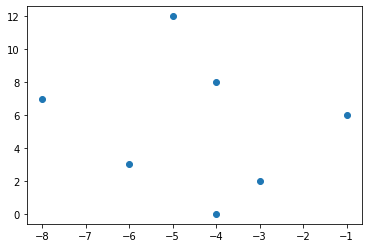

In [2]:
import matplotlib.pyplot as plt

points = [Point(-4, 0.), 
          Point(-5, 12.),
          Point(-6., 3.),
          Point(-8., 7.),
          Point(-4., 8.),
          Point(-3., 2.),
          Point(-1., 6.)]

xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)
plt.show()

## LineStrings

<img src="../resources/assets/namerica_rivers.jpg" width="700">

In [3]:
from shapely.geometry import LineString

line = LineString([(0, 0), (1, 1)])

print("Area", line.area)
print("Length", line.length)
print("Bounds", line.bounds)
print("Longitude, Latitude", line.xy)

Area 0.0
Length 1.4142135623730951
Bounds (0.0, 0.0, 1.0, 1.0)
Longitude, Latitude (array('d', [0.0, 1.0]), array('d', [0.0, 1.0]))


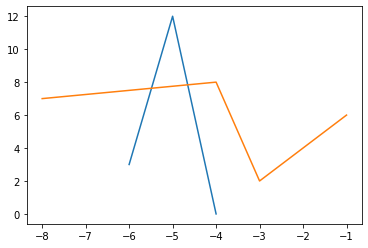

In [4]:
Lines = [LineString([Point(-4, 0.), Point(-5, 12.), Point(-6., 3.)]),
         LineString([Point(-8., 7.),Point(-4., 8.),Point(-3., 2.),Point(-1., 6.)])]

plt.plot(Lines[0].xy[0], Lines[0].xy[1])
plt.plot(Lines[1].xy[0], Lines[1].xy[1])
plt.show()


## Polygons


<img src="../resources/assets/timezones.png" width="700">


In [5]:
from shapely.geometry import Polygon

polygon = Polygon([(0, 0), (1, 1), (1, 0)])

print("Area", polygon.area)
print("Length", polygon.length)
print("Bounds", polygon.bounds)
print("Boundary", polygon.boundary)
print("Center", polygon.centroid)

Area 0.5
Length 3.414213562373095
Bounds (0.0, 0.0, 1.0, 1.0)
Boundary LINESTRING (0 0, 1 1, 1 0, 0 0)
Center POINT (0.6666666666666666 0.3333333333333333)


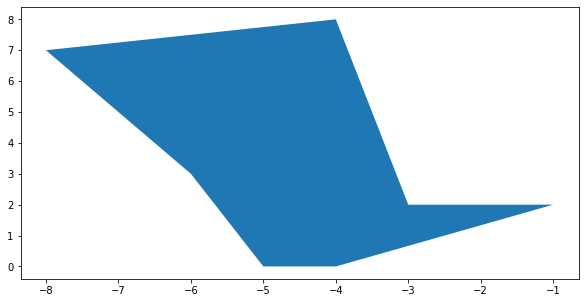

In [15]:
Polygons = Polygon([(-4, 0.), (-5, 0.),(-6., 3.), (-8., 7.),(-4., 8.),(-3., 2.), (-1., 2.)])

plt.figure(figsize=(10, 5))
plt.fill(*Polygons.exterior.xy)
plt.show()

In [7]:
import shapely.ops as so
import matplotlib.pyplot as plt
from itertools import combinations

r1 = Polygon([(0,0),(0,1),(1,1),(1,0),(0,0)])
r2 = Polygon([(1,1),(1,2),(2,2),(2,1),(1,1)])
r3 = Polygon([(0.5,0.5),(0.5,1.5),(1.5,1.5),(1.5,0.5),(0.5,0.5)])
r4 = Polygon([(3,3),(3,4),(4,4),(4,3),(3,3)])

polygons = [r1, r2, r3, r4]
new_shape = so.unary_union([r1, r2, r3])
multipolygon = so.unary_union([r1, r2, r3, r4])

![alt text](../resources/assets/polygon_operations.png "Title")

In [8]:
import geopandas as gpd
import pandas as pd

points = [Point(-4, 0.), Point(-5, 12.),Point(-6., 3.),Point(-8., 7.),Point(-4., 8.),Point(-3., 2.),Point(-1., 6.)]

points_gdf = gpd.GeoDataFrame(pd.DataFrame({'Name': ["P1","P2","P3","P4","P5","P6","P7"]}), 
                              crs="EPSG:4326", 
                              geometry=points)

Lines = [LineString([Point(-4, 0.), Point(-5, 12.), Point(-6., 3.)]),
         LineString([Point(-8., 7.),Point(-4., 8.),Point(-3., 2.),Point(-1., 6.)])]

lines_gdf = gpd.GeoDataFrame(pd.DataFrame({'Name': ["Line 1", "Line 2"]}), 
                             crs="EPSG:4326", 
                             geometry=Lines)

geoms = Polygon([(0,0),(0,5),(5,5),(5,0),(0,0)])
polygon_gdf = gpd.GeoDataFrame(pd.DataFrame({'Name': ["Polygon"]}), 
                               crs="EPSG:4326", 
                               geometry=[geoms])

gdf = pd.concat([points_gdf, lines_gdf, polygon_gdf]).reset_index(drop=True)
gdf["area"] = gdf.area
gdf['boundary'] = gdf.boundary
gdf['centroid'] = gdf.centroid

print(gdf)

      Name                                           geometry  area  \
0       P1                           POINT (-4.00000 0.00000)   0.0   
1       P2                          POINT (-5.00000 12.00000)   0.0   
2       P3                           POINT (-6.00000 3.00000)   0.0   
3       P4                           POINT (-8.00000 7.00000)   0.0   
4       P5                           POINT (-4.00000 8.00000)   0.0   
5       P6                           POINT (-3.00000 2.00000)   0.0   
6       P7                           POINT (-1.00000 6.00000)   0.0   
7   Line 1  LINESTRING (-4.00000 0.00000, -5.00000 12.0000...   0.0   
8   Line 2  LINESTRING (-8.00000 7.00000, -4.00000 8.00000...   0.0   
9  Polygon  POLYGON ((0.00000 0.00000, 0.00000 5.00000, 5....  25.0   

                                            boundary  \
0                           GEOMETRYCOLLECTION EMPTY   
1                           GEOMETRYCOLLECTION EMPTY   
2                           GEOMETRYCOLLECTION EMP

C:\Users\AdamS\AppData\Local\Temp\ipykernel_1360\275972203.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area
C:\Users\AdamS\AppData\Local\Temp\ipykernel_1360\275972203.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


In [9]:
geoms = [Polygon([(0,0),(0,5),(5,5),(5,0),(0,0)]),
         Polygon([(2.5,2.5),(2.7,7.5),(7.5,7.5),(7.5,2.5),(2.5,2.5)])]
polygon1_gdf = gpd.GeoDataFrame(pd.DataFrame({'Name': ["Polygon1"]}), 
                               crs="EPSG:4326", 
                               geometry=[geoms[0]])
polygon2_gdf = gpd.GeoDataFrame(pd.DataFrame({'Name': ["Polygon1"]}), 
                               crs="EPSG:4326", 
                               geometry=[geoms[1]])

In [10]:
intersection = polygon2_gdf.overlay(polygon1_gdf, how='intersection')
union = polygon2_gdf.overlay(polygon1_gdf, how='union')
symetrical_difference = polygon2_gdf.overlay(polygon1_gdf, how='symmetric_difference')
difference = polygon2_gdf.overlay(polygon1_gdf, how='difference')

![alt text](../resources/assets/operations1.png "Title")

<Figure size 720x360 with 0 Axes>

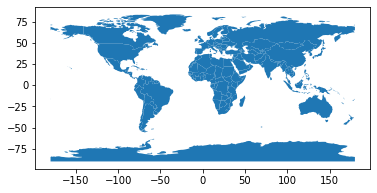

In [16]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot()
plt.show()

## Rasters

![alt text](../resources/assets/pakistan.png "Title")

Width 1024
Height 1024
Bounds BoundingBox(left=0.0, bottom=1024.0, right=1024.0, top=0.0)
CRS None


C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


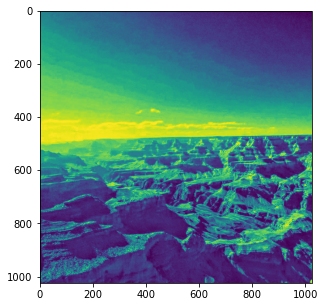

In [17]:
import rasterio

dataset = rasterio.open('../resources/assets/GC.jpg')
print("Width", dataset.width)
print("Height", dataset.height)
print("Bounds", dataset.bounds)
print("CRS", dataset.crs)
plt.imshow(dataset.read(1))
plt.show()

## Projections

<img src="../resources/assets/pierce_q.png" width="700">


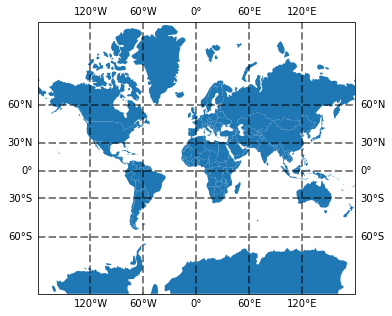

In [18]:
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Mercator())
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='--')
plt.show()

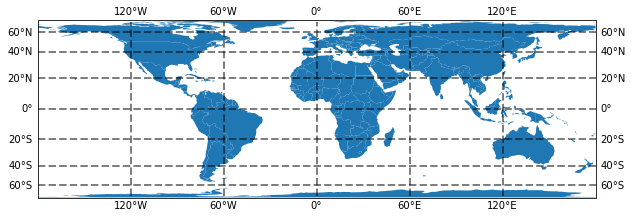

In [19]:
plt.figure(figsize=(10, 5))

ax = plt.axes(projection=ccrs.LambertCylindrical())
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='--')
plt.show()